In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

# Анализ банка

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно **установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов**.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

→ Вам предстоит подготовить **мини-отчёт о проделанной работе в виде ноутбука**, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

## ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Итак, для начала считаем исходную файл_таблицу и посмотрим из чего она состоит:

In [4]:
churn_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Выполнение 

**9.1.** Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Статус отношения клиента к банку')

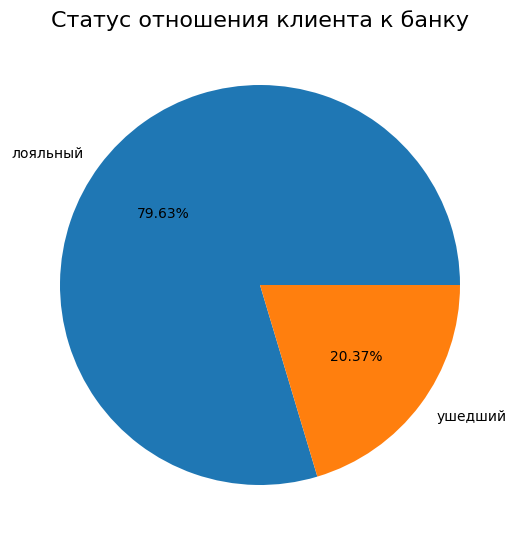

In [5]:
#Построем круговую диаграмму
#Сохраним в line_data информацию о колличстве 1-ушедших и 0-лояльных клиентов
line_data = churn_data['Exited'].value_counts()
#Заменим название в line_data и присвоем 1 имя ушедший, а 0 лояльный
line_data = line_data.rename(index={1:'ушедший',0:'лояльный'})

#создадим и зададим размер диаграммы
fig = plt.figure(figsize=(5,5))
#установим отступы и расположение графика
axes = fig.add_axes([0,0,1,1])
#нарисуем круовую диаграмму
axes.pie(
    line_data, # значения, покоторым будет строится диограмма
    labels = line_data.index,#метки,соотвтствующие значениям
    autopct = '%.2f%%',#укажем формат отображения долей
)
#дадим названвние диаграмме 
axes.set_title('Статус отношения клиента к банку',fontsize=16)

Вывод: из графика видно,что процентное соотношение ушедший клиентов более 20%, что не является положительным признаком. Необходимо дополнительного исследования, причин влияющих на этот показатель и выработки решений по его снижению.

**9.2.** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [6]:
#Построим коробчатый график
#сделаем выборку по клиентом баланс которых более 2500 долларов
box_data = churn_data[churn_data['Balance']>2500]
#обьеденим значение 0 - лояльный и 1 -ушедший, в 'общий' для простоты визуализации
box_data['Exited'] = churn_data['Exited'].apply(lambda x: 'общий' if x==1 else'общий').astype('object')

#для решения задания 9.2. используем метод box() (коробчатая диограмма)
fig = px.box(
    data_frame = box_data,  # DataFrame, покоторым будет строится диограмма
    x = 'Balance',          #Значения по оси абсцисс
    y = 'Exited',           #Значения по оси ординат
    height = 400,           #высота графика
    width = 1000,           #ширина графика
    title = 'Распределение по сумме вклада каждого лиента', #название графика
)
fig.show()  #Выводим график на экран

C:\Users\AAPun\AppData\Local\Temp\ipykernel_1096\2837394796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_data['Exited'] = churn_data['Exited'].apply(lambda x: 'общий' if x==1 else'общий').astype('object')


Вывод: на графике видно какая сумм на счетах у клиентов, максимальное и минимальное значение. В основном сумма на счетах клинтов составляет от 100тыс.дол до 140тыс.дол. А так же квантиль q1 на графике, говорит что 25% всех клиентов со вкладом менне 100тыс.дол, а квантиль q3 показывает что 25% из всех клиентов по вкладу более 140тыс.дол.

**9.3.** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [7]:
box_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,общий
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,общий
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,общий
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,общий
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,общий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,общий
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,общий
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,общий
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,общий


In [8]:
#переименуе значение 0 - лояльный и 1 -ушедший, для простоты визуализации
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'ушедший' if x==1 else'лояльный').astype('object')
box_data1 = churn_data
#сделаем выборку по клиентом баланс которых более 2500 долларов
box_data1 = churn_data[churn_data['Balance']>2500]
#Построим коробчатую диограмму
fig1 = px.box(
    data_frame = box_data1, 
    x = 'Balance',
    y = 'Exited',
    points="all", 
    height = 600,   #высота графика
    width = 1000,   #ширина графика
    title = 'Распределение по сумме вклада каждого лиента',
)
fig1.show()

**Вывод:** на графике видно какая сумм на счетах у клиентов, максимальное и минимальное значение. Видно что от типа клиента будь то ушедший или лоялный картина приблизительно одинаковая. В основном сумма на счетах клинтов составляет от 100тыс.$ до 140тыс.$. Точки более наглядно отображают индивидуальный счёт-баланс каждого клиента. Причиной оттока могли послужить не надёжность банка, плохая работа сотрудников банка, слабая рекламная и не актуальная рекламная политика, слишком высокие ставки по кредитам и низкие по вкладам по отношению к конкурентам. Медленная работа банка и отсутствие клиентской поддержки и другие, но попробуем вывести дальше возможные проблеммы уже из имеющихся признаков.

**9.4.** Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [9]:
#Отфильтруем DataFrame churn_data и создадим новый departed_client
departed_client = churn_data[(churn_data['Exited']=='ушедший')&(churn_data['Balance']>2500)]

In [10]:
#Сгруппируем данные по возрасто, а в качестве значения общий баланс
line_data = departed_client.groupby(
    by='Age'
)['Balance'].sum()
#Можно просмотреть информацию колличественных значения
# line_data

<AxesSubplot: title={'center': 'Зависимость ушедших клиентов от возраста и баланса'}, xlabel='Age'>

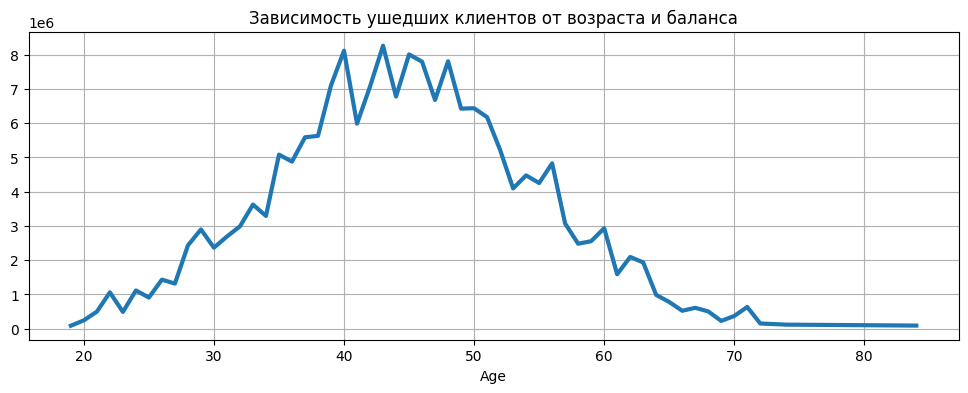

In [11]:
#Нарисуем линейный график
line_data.plot(
    kind = 'line',      #выбор линейног типа графика 
    figsize = (12,4),   #размер графика
    title = 'Зависимость ушедших клиентов от возраста и баланса',#название
    grid = True,        #Выведем решётку
    lw = 3              #ширина линии
)

Вывод: из графика ввидно что наибольший удельй вес по балансу на счёте, у людей в возрастной категории от 35лет до 55лет. Основной акцент сделаем на эту возростную группу.

**9.5.** Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

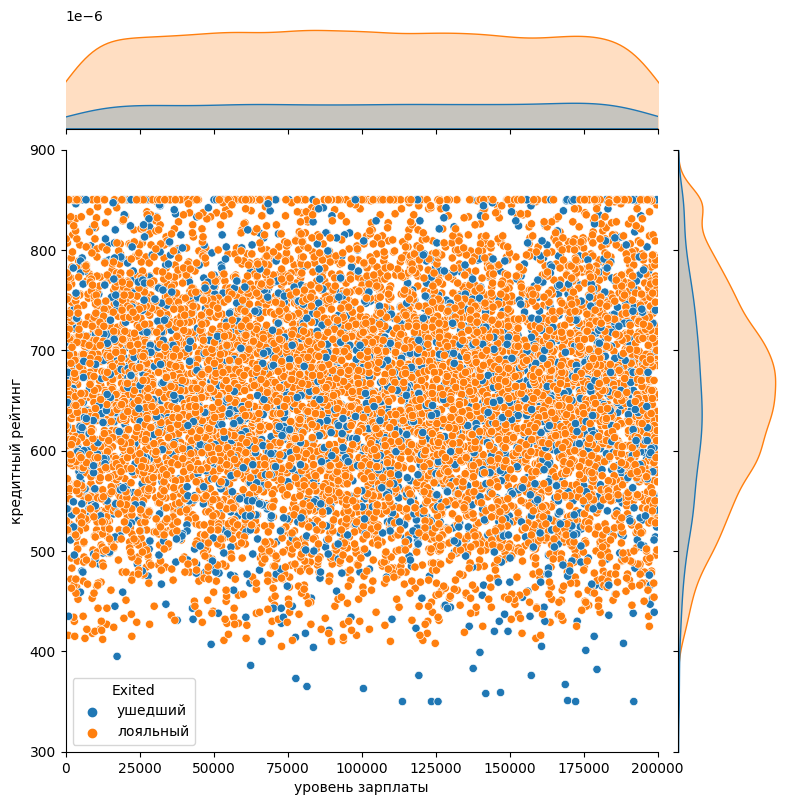

In [12]:
#Нарисуем график распределения
jointplot1 = sns.jointplot(
    data=churn_data,        #DataFrame откуда берутся значения
    x='EstimatedSalary',    #уровень зарплат по оси абсцисс
    y='CreditScore',        #кредитный рейтинг по оси ординат
    hue='Exited',           #группировочный категориальный призак
    xlim = (0, 200000),     #диапазон значений по оси абсцисс
    ylim = (300, 900),      #диапазон значений по оси ординат
    height=8,               #размер
)
jointplot1.set_axis_labels('уровень зарплаты','кредитный рейтинг')

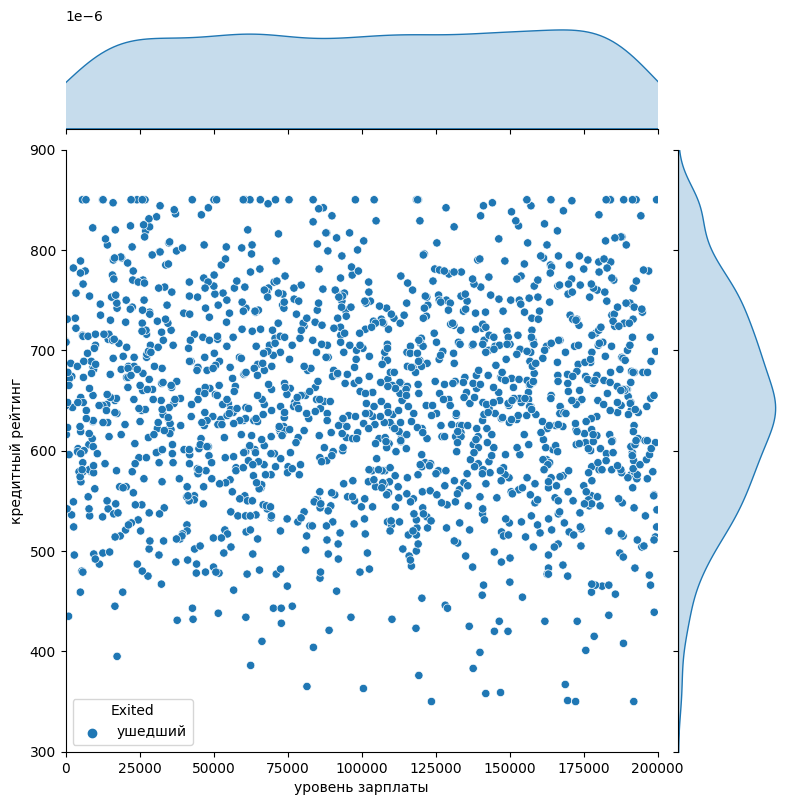

In [13]:
#Построим график распределения,но только из ушедших клиентов для наглядности
jointplot = sns.jointplot(
    data=departed_client,   #DataFrame откуда берутся значения
    x='EstimatedSalary',    #уровень зарплат по оси абсцисс
    y='CreditScore',        #кредитный рейтинг по оси ординат
    hue='Exited',           #группировочный категориальный призак
    xlim = (0, 200000),     #диапазон значений по оси абсцисс
    ylim = (300, 900),      #диапазон значений по оси ординат
    height=8                #размер
)
jointplot.set_axis_labels('уровень зарплаты','кредитный рейтинг')

**Вывод 9.5:** мы отобразили 2 графика распределения кредитного рейтинга и уровня зарплат клиентов, на втором графике показали динамику среди лишь только ушедших клиентов.  На графиках не прослеживается строгой зависимости. Можно выделить, что в средний уровень рейтинга большинтва состовляет от 600-700. 

**9.6.** Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [14]:
#Выделем сколько клиентов мужчин и женщин всего
F_or_M_all = churn_data['Gender'].value_counts()
F_or_M_all

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
#Выделем сколько клиентов мужчин и женщин из числа ушедших клиентов
F_or_M = departed_client['Gender'].value_counts()
F_or_M

Female    849
Male      688
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Зависимость ушедших клиентов от пола')

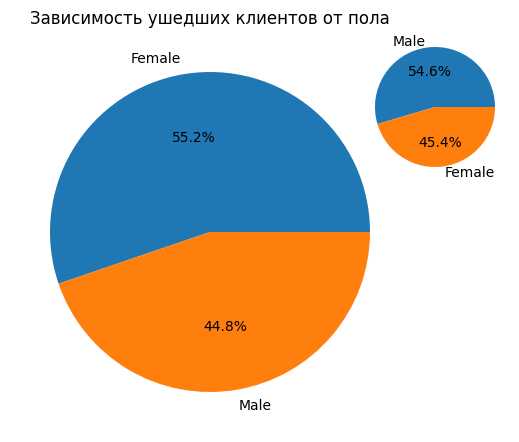

In [16]:
#Построим круговую диаграмму
fig = plt.figure(figsize=(5,5))
#установим отступы и расположение графика 
axes = fig.add_axes([0,0,0.8,0.8])
#нарисуем круовую диаграмму
axes.pie(
    F_or_M,                     # значения, покоторым будет строится диограмма
    labels = F_or_M.index,
    autopct = '%.1f%%',         #укажем формат отображения долей
    explode = [0,0]
)
insert_axes = fig.add_axes([0.7, 0.5, 0.3, 0.3])
insert_axes.pie(F_or_M_all,
    labels = F_or_M_all.index,  # значения, покоторым будет строится диограмма
    autopct = '%.1f%%',         #укажем формат отображения долей
    explode = [0,0] 
)
axes.set_title('Зависимость ушедших клиентов от пола')

**Вывод 9.6:** На большом круге видно, что колличество ушедших женщин на 10% больше чем мужчин, хотя из общего числа клиентов это маленький круг видно обратное, что мужчин на 10% изночально больше. Это говорит о том, что женщин что то не устраивает в банке. 

**9.7.** Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [17]:
pro_group = churn_data.groupby(by='NumOfProducts')['Exited'].value_counts()
pro_group

NumOfProducts  Exited  
1              лояльный    3675
               ушедший     1409
2              лояльный    4242
               ушедший      348
3              ушедший      220
               лояльный      46
4              ушедший       60
Name: Exited, dtype: int64

<AxesSubplot: xlabel='NumOfProducts,Exited'>

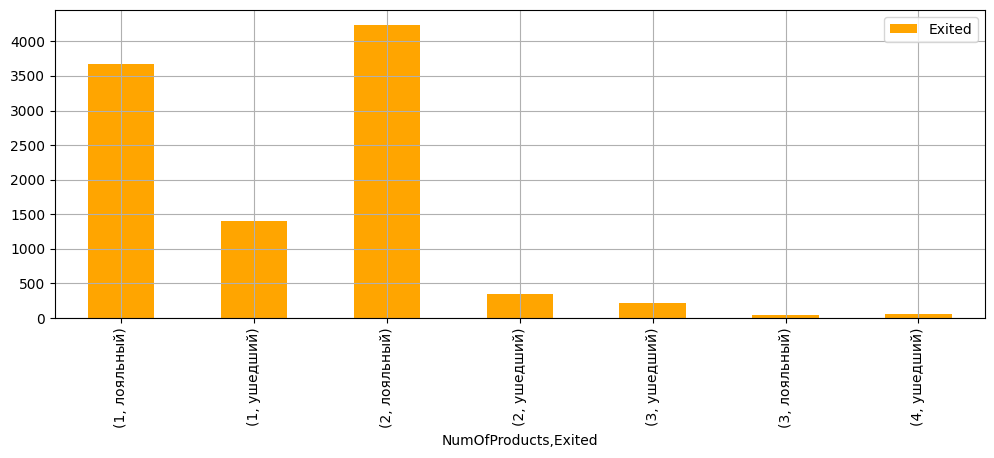

In [18]:
pro_group = churn_data.groupby(by='NumOfProducts')['Exited'].value_counts()
#Постром бар диаграмму
pro_group.plot(
    kind='bar',         #столбчатый тип графика
    grid=True,          #изображени сетки на графике
    figsize=(12, 4),    #размер графика
    legend=True,        #вывод легенды на графике
    color = 'orange'    #цвет столбцов
)

**Вывод 9.7:** из графика видно, что наибольший спрос на 1 и 2 услуги банка. Те что клиенты воспользовались 4 услугми просто покинули банк. Клиенты которые воспользовались 1 услугой тоже имею большое колличество ушедших клиентов в колличестве 1409 чел именно с этой группой и нужно работать, необходима дополнительная информации по роду услуг и какая именно услуга отталкивает клиентов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [19]:
#Сгруппируем таблицу по признаку IsActiveMember и Exited, по числу клиентов
group_98 = churn_data.groupby(
    by='IsActiveMember'
)['Exited'].value_counts()
group_98

IsActiveMember  Exited  
0               лояльный    3547
                ушедший     1302
1               лояльный    4416
                ушедший      735
Name: Exited, dtype: int64

<AxesSubplot: xlabel='IsActiveMember,Exited'>

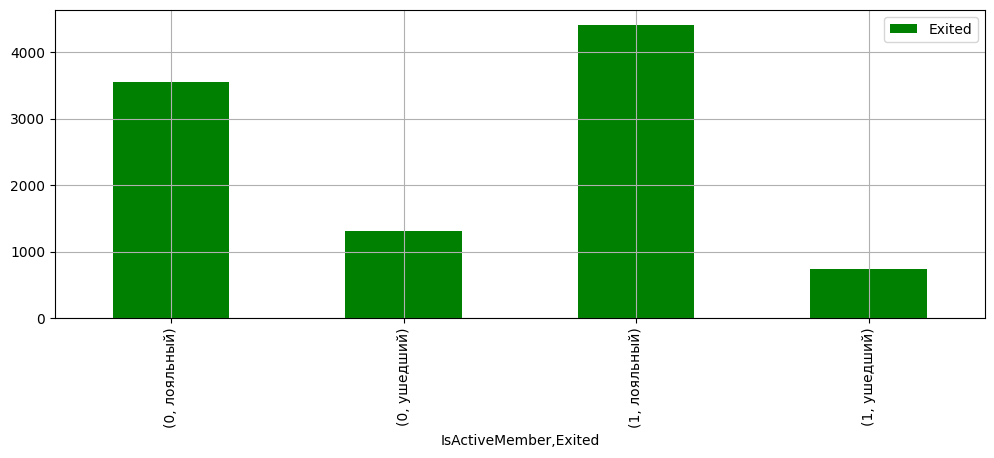

In [20]:
#Построим столбчатый график
group_98.plot(
    kind='bar',         #тип диаграммы
    grid=True,          #с реёткой
    figsize=(12, 4),    #размер графика
    legend=True,        #с легендой
    color = 'green'     #цвет столбцов
)

**Вывод 9.8:** из графика если клиент, активный то вероятность того что он уйдёт меньше, нежели наоборот. Нужно мотивировать людей на более активное участие, а это значит устраивать кокурсы, розыгрыши, делать информации наиболее простой и удобной, понятной для пользователя и доносить её до него.

**9.9.** В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [21]:
# cчитываем DataFrame в чистой форме
churn_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip')

#Отфильтруем churn_data в новый DataFrame, где только ушедшие клиенты в столбце 'Exited' 
departed_client = churn_data[churn_data['Exited'] == 1]

#Добавим стобец 'departed_per', который показывает  
#процент покинувших клиентов из общего числа покинувших клиентов
x = departed_client['Exited'].count()
departed_client['departed_per'] = (departed_client['Exited'])/x*100

#отсортируем departed_client по признаку 'Tenure'
departed_client = departed_client.sort_values(by='Tenure')

C:\Users\AAPun\AppData\Local\Temp\ipykernel_1096\857516828.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Создадим сводную таблицу
group_table = departed_client.groupby(
    by=['Tenure','Geography']
)['departed_per'].sum().round(2)
#Можно посмотреть значения
group_table

Tenure  Geography
0       France       1.72
        Germany      1.77
        Spain        1.18
1       France       4.07
        Germany      5.15
        Spain        2.16
2       France       4.42
        Germany      3.14
        Spain        2.31
3       France       4.07
        Germany      4.12
        Spain        2.26
4       France       4.17
        Germany      3.73
        Spain        2.06
5       France       3.73
        Germany      4.42
        Spain        2.11
6       France       3.78
        Germany      3.73
        Spain        2.11
7       France       3.73
        Germany      2.99
        Spain        1.96
8       France       3.39
        Germany      4.27
        Spain        2.01
9       France       4.32
        Germany      4.57
        Spain        1.57
10      France       2.36
        Germany      2.06
        Spain        0.54
Name: departed_per, dtype: float64

In [23]:
# переведём сводную таблицу в DataFrame
group_table = pd.DataFrame(group_table) 
# преобразуем индексы ['Tenure','Geography'] в колонки
departed_client_new = group_table.reset_index()

In [24]:
#Построим тепловую карту, на которой видна процентная доля покинувших
#клинтов за колличество лет пользования услугами банка

fig = px.choropleth(
    data_frame=departed_client_new,     #DataFrame
    locations='Geography',              #столбец с локациями
    locationmode = "country names",     #режим сопоставления локаций с базой Plotly
    color='departed_per',               #от чего зависит цвет
    animation_frame="Tenure",           #анимационный бегунок
    range_color=[0, 5],                 #диапазон цвета
    title='Global',                     #заголовок
    width=800,                          #ширина
    height=500,                         #высота
    color_continuous_scale='ylorbr'     #палитра цветов
)

#отображаем график
fig.show()

**Вывод 9.9:** на тепловой карте видно какая тендении оттока клиентов по страном в процентном выражении. Наибольшим значением является Германия 5.15% за один год. Так можно сделать вывод, что в Германии и Франции отток клиентов составляет около 4% в среднем, а у Испании около 2%. В целом можно говорить о том, что колличество ушедших клиентов от страны не изменяется, нужно рассматривать иные причины.

**9.10.** Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [25]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [26]:
churn_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip')
# departed_client = churn_data[churn_data['Exited'] == 1]
churn_data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [27]:
#Отсортируем churn_data по признаку Tenure
churn_data = churn_data.sort_values(by=['Tenure'])

In [28]:
#Создадим новый признак CreditScoreCat в churn_data 
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [29]:
#Создадим сводную таблицу
pivot_table_ch = churn_data.pivot_table(
    values = 'Exited', #
    index = 'CreditScoreCat',
    columns= 'Tenure',
    aggfunc = 'mean',
    fill_value = 0
)
pivot_table_ch

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'Зависимось кредитного рейтинга и колличества лет')

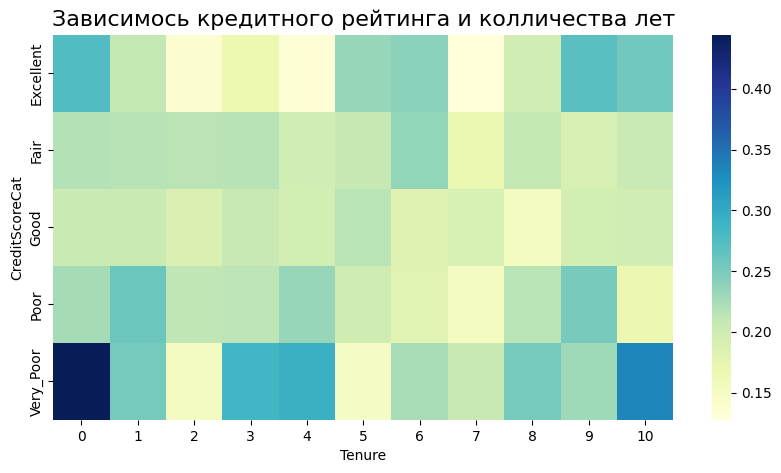

In [30]:
fig = plt.figure(figsize=(10,5)) #размер диаграммы
#Создадим тепловую карту
heatmap = sns.heatmap(data=pivot_table_ch, cmap='YlGnBu')
#название 
heatmap.set_title('Зависимось кредитного рейтинга и колличества лет', fontsize=16)

**Вывод 9.10:** на тепловой карте видно, что люди с плохим кредитным рейтингом, чаще всего покидают банк, в принципе это и не плохо, т.к. зачем банку клиенты которые не выполняют своих обязательств. Но есть и тревожные звоночки,где клиенты с рейтингом 'Exellent' уходять из банка в 25-35 % случаях. Нужно провести провести дополнительные наблюдения, почему клинты с рейтингом (Good, Fair, Excellent) имеют тенденциию покидать банк в 20 случаях из 100.

Axewyl